<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/Cifar10(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

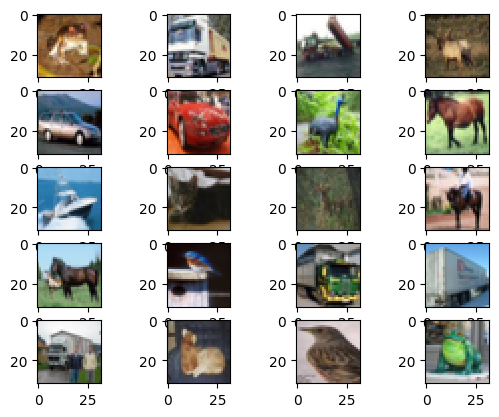

(50000, 10)
(10000, 10)
Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 1.5682 - accuracy: 0.4266
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.1724 - accuracy: 0.5846
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 1.0025 - accuracy: 0.6470
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.8926 - accuracy: 0.6854
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8294 - accuracy: 0.7085
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7715 - accuracy: 0.7281
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7330 - accuracy: 0.7434
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6891 - accuracy: 0.7574
Epoch 9/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6609 - accuracy: 0.7663
Epoch 10/20
782/782 [==============================] - 6s 8ms/step - loss: 0

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
plt.show()

x_train = x_train.reshape(50000, 32,32,3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 32,32,3)
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU,Dropout,Activation, ReLU
from keras.optimizers import Adam,SGD

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=64,epochs=20, verbose=1)


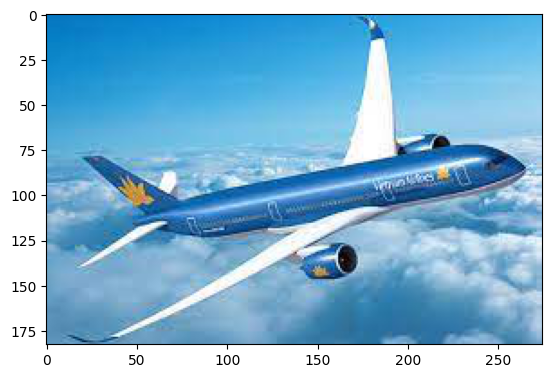

In [6]:
import pandas as pd
url = 'maybay.jpg'
img = plt.imread(url)
plt.imshow(img)
plt.show()


ValueError: ignored

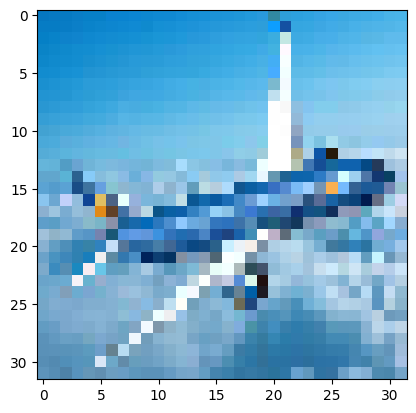

In [7]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

In [ ]:
model.save('Cifar10(CNN).h5')

In [ ]:

test = model.evaluate(x_test, y_test, verbose =0)
print('Test less:', test[0])
print('Test accuracy:', test[1])
loss=train.history['loss']
accuracy=train.history['accuracy']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label='Traing accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()